# **Mushroom classification**

In [77]:
#importing necessary packages
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import cross_val_predict, cross_val_score

In [78]:
#Reading the dataset
df = pd.read_csv("/content/mushrooms.csv")

In [79]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


There are no null values in tha dataset, the dataset is a clean dataset.

In [80]:
df.shape

(8124, 23)

There are 8214 rows and 23 columns.

In [81]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [82]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [83]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

The dataset has 4208 edible mushrooms and 3916 poisonous mushrooms.

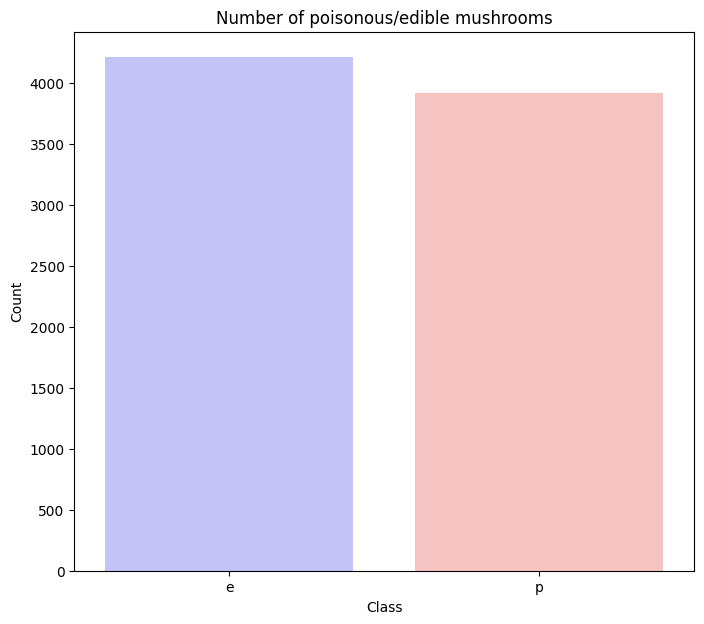

In [84]:
count = df['class'].value_counts()

# Sort classes by label (assuming labels are 'e' and 'p')
sorted_classes = sorted(count.index)

sns.set_context(font_scale=1.5)
plt.figure(figsize=(8, 7))
sns.barplot(x=sorted_classes, y=count[sorted_classes], alpha=0.8, palette="bwr")
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Number of poisonous/edible mushrooms')
# plt.savefig("count.jpeg", format='jpeg', dpi=300)
plt.show()


In [85]:
#specifying the dependent and independent variables
X = df.drop(['class'], axis=1)
y = df["class"]
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [86]:
#Changing the categorical columns into numerical using labelencoder.
labelencoder_x=LabelEncoder()
for column in X.columns:
    X[column] = labelencoder_x.fit_transform(X[column])

labelencoder_y=LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [87]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [88]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [89]:
#Performing one hot encoding on the categorical columns
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [90]:
#split the dataset into train and test data, 30% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X2 = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

In [93]:
#perform dimensionality reduction on the X column
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
print("Original shape:",X_train.shape)
print('Shape of PCA data:',X_train_pca.shape)

Original shape: (5686, 95)
Shape of PCA data: (5686, 2)


# Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

LogisticRegression()

TEST DATA RESULTS:

Accuracy Score: 0.9028

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438




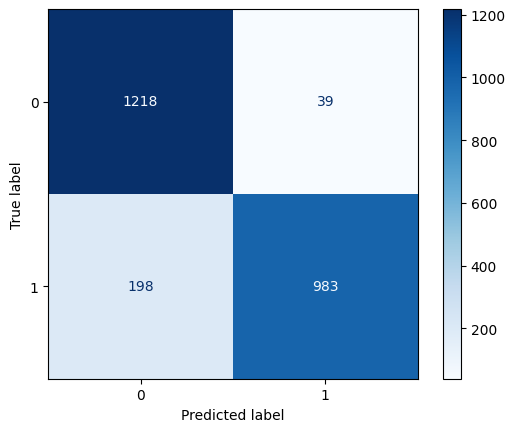

Average Accuracy:	0.9066

Standard Deviation:	0.0103

Precision: 0.9618

Recall: 0.8323

F1 Score: 0.8924



In [95]:
print("TEST DATA RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,lr.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,lr.predict(X_test_pca))))
cm = confusion_matrix(y_test,lr.predict(X_test_pca))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.show()

res = cross_val_score(lr, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
y_pred = lr.predict(X_test_pca)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}\n')
print(f'Recall: {recall:.4f}\n')
print(f'F1 Score: {f1:.4f}\n')


# Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier as DT

dt = DT(criterion='entropy',random_state=42)
dt.fit(X_train_pca,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

TEST DATA RESULTS:

Accuracy Score: 0.8909

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1257
           1       0.88      0.89      0.89      1181

    accuracy                           0.89      2438
   macro avg       0.89      0.89      0.89      2438
weighted avg       0.89      0.89      0.89      2438




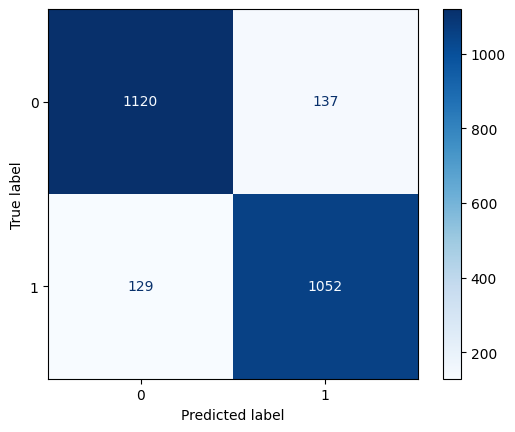

Average Accuracy:	0.8890

Standard Deviation:	0.0111

Precision: 0.8848

Recall: 0.8908

F1 Score: 0.8878



In [97]:
print("TEST DATA RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,dt.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,dt.predict(X_test_pca))))
#print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test_pca))))
cm = confusion_matrix(y_test,dt.predict(X_test_pca))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.show()

res = cross_val_score(dt, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
y_pred = dt.predict(X_test_pca)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}\n')
print(f'Recall: {recall:.4f}\n')
print(f'F1 Score: {f1:.4f}\n')

# K-Nearest Neighbors

In [98]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN()
knn.fit(X_train_pca,y_train)

KNeighborsClassifier()

TEST  DATA RESULTS:

Accuracy Score: 0.9204

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1257
           1       0.95      0.88      0.91      1181

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438




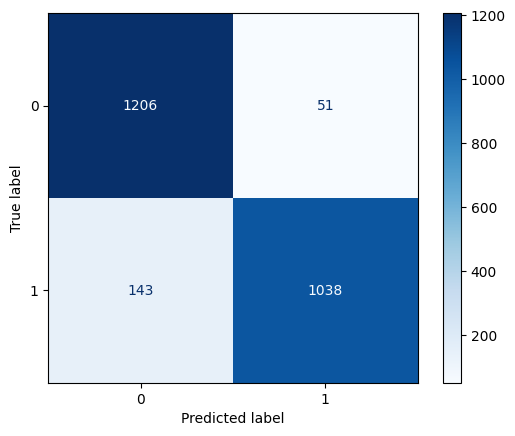

Average Accuracy:	0.9289

Standard Deviation:	0.0101

Precision: 0.9532

Recall: 0.8789

F1 Score: 0.9145



In [99]:
print("TEST  DATA RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,knn.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,knn.predict(X_test_pca))))
#print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,knn.predict(X_test_pca))))
cm = confusion_matrix(y_test,knn.predict(X_test_pca))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.show()
res = cross_val_score(knn, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
y_pred = knn.predict(X_test_pca)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}\n')
print(f'Recall: {recall:.4f}\n')
print(f'F1 Score: {f1:.4f}\n')

# Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB as NB

nb = NB()
nb.fit(X_train_pca,y_train)

GaussianNB()

TEST DATA  RESULTS:

Accuracy Score: 0.8975

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1257
           1       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438




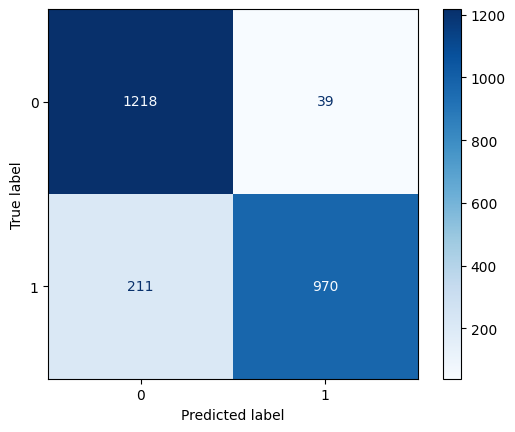

Average Accuracy:	0.8987

Standard Deviation:	0.0113

Precision: 0.9613

Recall: 0.8213

F1 Score: 0.8858



In [101]:
print("TEST DATA  RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,nb.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,nb.predict(X_test_pca))))
#print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,nb.predict(X_test_pca))))
cm = confusion_matrix(y_test,nb.predict(X_test_pca))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.show()
res = cross_val_score(nb, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
y_pred = nb.predict(X_test_pca)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}\n')
print(f'Recall: {recall:.4f}\n')
print(f'F1 Score: {f1:.4f}\n')

## Linear Discriminant Analysis

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train_pca, y_train)

LinearDiscriminantAnalysis()

TEST DATA RESULTS:

Accuracy Score: 0.8811

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1257
           1       0.98      0.77      0.86      1181

    accuracy                           0.88      2438
   macro avg       0.90      0.88      0.88      2438
weighted avg       0.90      0.88      0.88      2438




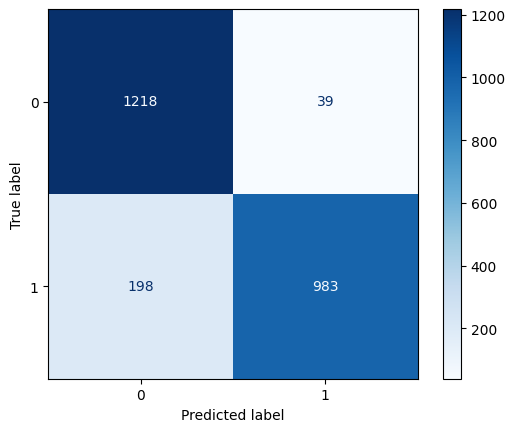

Average Accuracy:	0.8896

Standard Deviation:	0.0106

Precision: 0.9765

Recall: 0.7731

F1 Score: 0.8629



In [103]:
print("TEST DATA RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,lda.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,lda.predict(X_test_pca))))
#print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,lda.predict(X_test_pca))))
cm = confusion_matrix(y_test,lr.predict(X_test_pca))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.show()
res = cross_val_score(lda, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
y_pred = lda.predict(X_test_pca)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}\n')
print(f'Recall: {recall:.4f}\n')
print(f'F1 Score: {f1:.4f}\n')

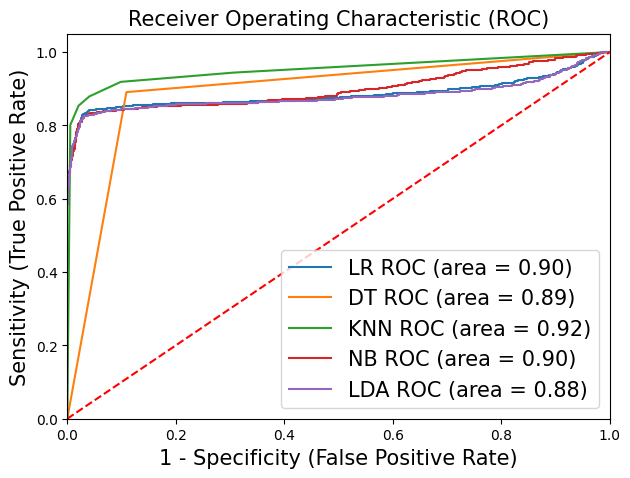

In [104]:
#ROC curve on test data
plt.figure(figsize=(7,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dt,
},

{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'NB',
    'model': nb,
},
{
    'label': 'LDA',
    'model': lda,
}

]

for m in models:
    model = m['model']
    model.fit(X_train_pca, y_train)
    y_pred=model.predict(X_test_pca)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
    auc = roc_auc_score(y_test,model.predict(X_test_pca))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.savefig("roc.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.show()